> Import Libraries

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder

> Loading Dataset

In [5]:
sales = sales = pd.read_csv("../Data/Data After Milestone 1.csv", encoding='latin-1')
sales.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,...,Ship Mode_Encoded,Segment_Encoded,Market_Encoded,Category_Encoded,Sub-Category_Encoded,Region_Encoded,Season_Encoded,Sales_Lag_1D,Sales_Lag_7D,Sales_Lag_30D
0,2012-07-31,2012-07-31,Same Day,Rick Hansen,Consumer,New York City,New York,United States,US,East,...,1,0,6,2,0,6,2,246.490581,246.490581,246.490581
1,2013-02-05,2013-02-07,Second Class,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,...,2,1,0,0,5,9,3,246.490581,246.490581,246.490581
2,2013-10-17,2013-10-18,First Class,Craig Reiter,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,...,0,0,0,2,13,9,0,246.490581,246.490581,246.490581
3,2013-01-28,2013-01-30,First Class,Katherine Murray,Home Office,Berlin,Berlin,Germany,EU,Central,...,0,2,4,2,13,3,3,246.490581,246.490581,246.490581
4,2013-11-05,2013-11-06,Same Day,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Africa,Africa,...,1,0,1,2,6,0,0,246.490581,246.490581,246.490581


# 1. Advanced Data Analysis: 

### • Conduct time series analysis to identify trends, seasonality, and cyclic patterns.

In [3]:
sales["Order Date"] = pd.to_datetime(sales["Order Date"], errors="coerce")
sales.set_index("Order Date", inplace=True)

monthly_sales = sales['Total_sales'].resample('M').sum()

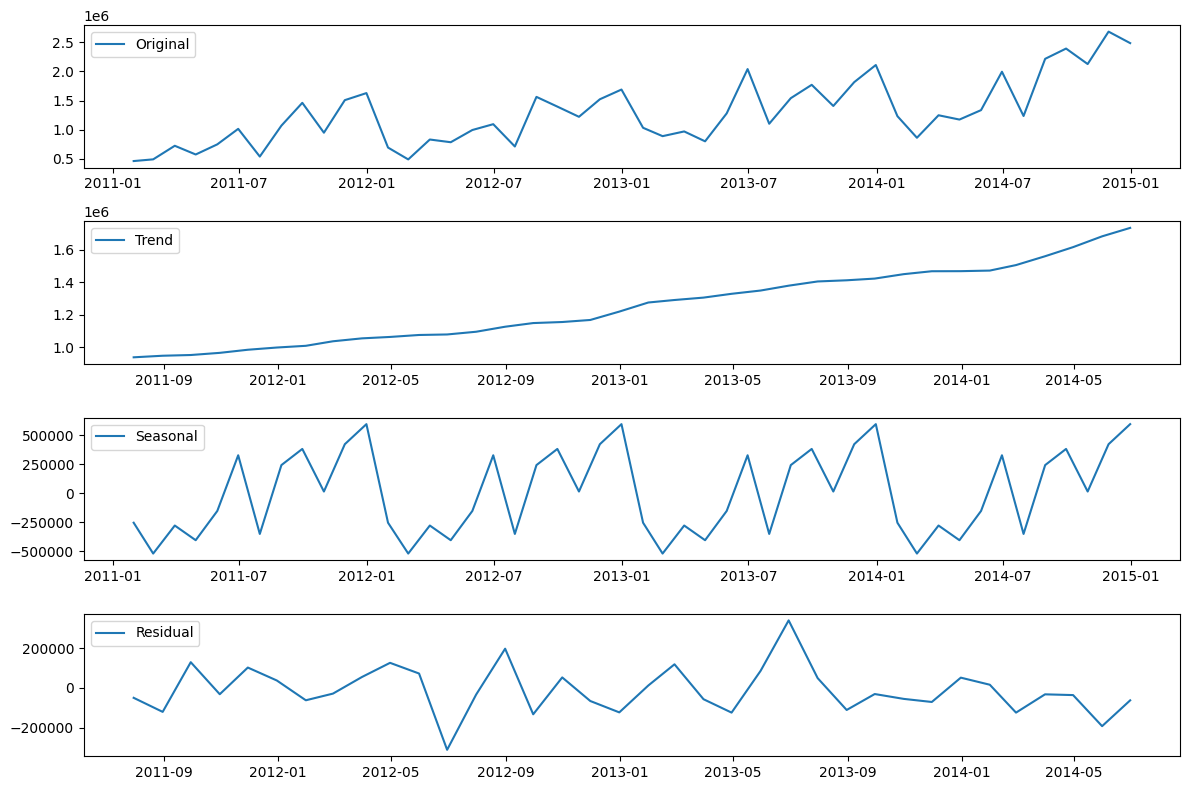

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(monthly_sales, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(monthly_sales, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

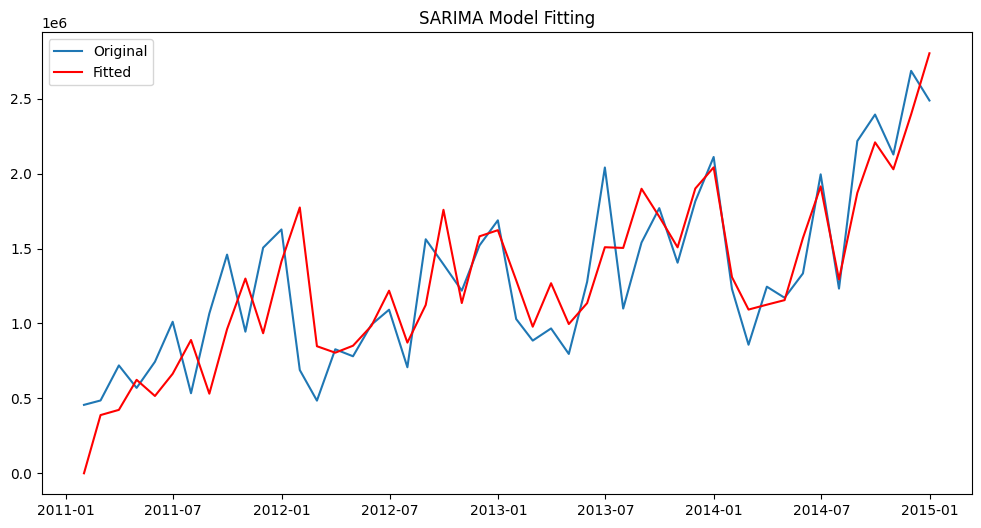

In [6]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_sarima = SARIMAX(monthly_sales, order=(1, 1, 1), seasonal_order= (1, 1, 1, 12))
model_sarima_fit = model_sarima.fit()

# print(model_sarima_fit.summary())

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Original')
plt.plot(model_sarima_fit.fittedvalues, color='red', label='Fitted')
plt.title('SARIMA Model Fitting')
plt.legend()
plt.show()

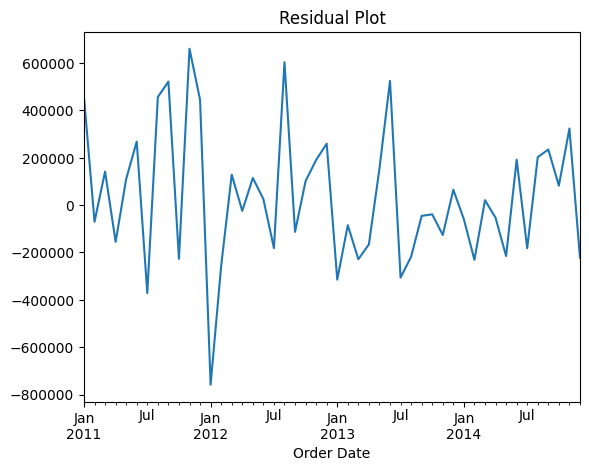

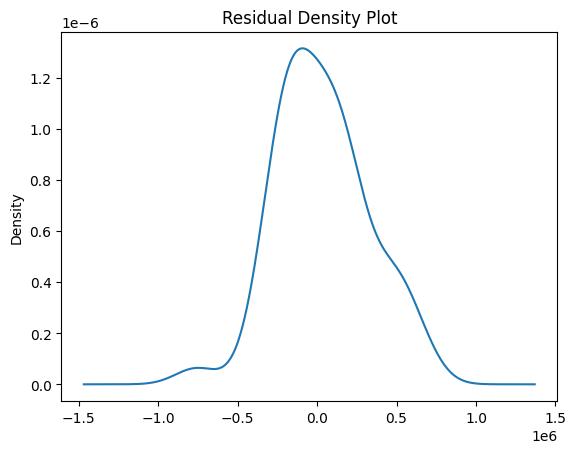

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

model = SARIMAX(monthly_sales,
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

model_fit = model.fit(disp=False)

# print(model_fit.summary())

residuals = model_fit.resid
residuals.plot(title="Residual Plot")
plt.show()

residuals.plot(kind='kde', title="Residual Density Plot")
plt.show()


### • Use statistical tests (e.g., ADF test for stationarity) to ensure data suitability for time series modeling. 

In [37]:
from statsmodels.tsa.stattools import adfuller

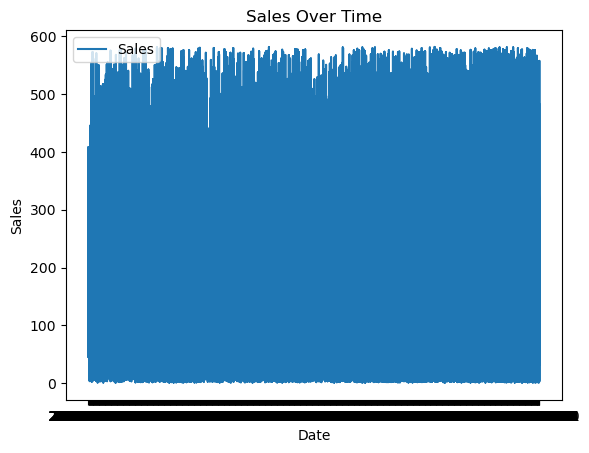

In [6]:
sales = sales.sort_values('Order Date') 
plt.plot(sales['Order Date'], sales['Sales'], label='Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Over Time')
plt.legend()
plt.show()

In [39]:
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print("ADF Test Results:")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value}")

    if result[1] <= 0.05:
        print("\n The data is stationary (reject null hypothesis).")
    else:
        print("\n The data is non-stationary (fail to reject null hypothesis).")

adf_test(sales['Sales'])


ADF Test Results:
ADF Statistic: -2.539187011610462
p-value: 0.10622843992682074
Critical Values:
   1%: -3.430477649815218
   5%: -2.861596418626623
   10%: -2.5668000297638165

 The data is non-stationary (fail to reject null hypothesis).


In [8]:
# Understanding the ADF Test Results
# ADF Statistic: -158.29
# This is the test statistic calculated by the ADF test.
# The more negative this value is, the stronger the evidence that the data is stationary.
#---------------------------------------------------------------------------------------------------
# p-value: 0.0
# The p-value tells us whether to reject or fail to reject the null hypothesis:
# If p-value ≤ 0.05 → Reject the null hypothesis → Data is stationary .
# If p-value > 0.05 → Fail to reject the null hypothesis → Data is non-stationary .
# Since p-value is 0.0, we strongly reject the null hypothesis, confirming that the data is already stationary.
#---------------------------------------------------------------------------------------------------
# Critical Values
# These values help compare the ADF Statistic:
# 1% Level: -3.430
# 5% Level: -2.862
# 10% Level: -2.567
# If the ADF Statistic (-158.29) is lower (more negative) than the critical values, it confirms stationarity.
# In our case, -158.29 is much lower than all critical values, so we confirm stationarity.
# What Does This Mean for our Forecasting?
# Because our data is already stationary, I do NOT need to transform it like differencing or log transformation.

### • Perform correlation analysis to explore the relationships between features such as sales, promotions, holidays, and weather.

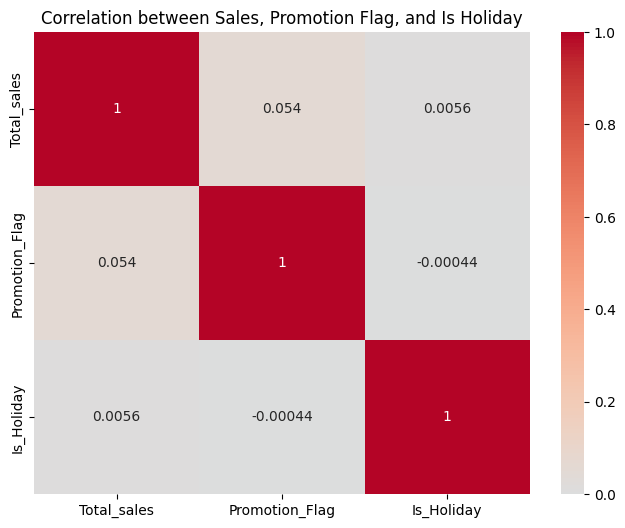

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(sales[['Total_sales', 'Promotion_Flag', 'Is_Holiday']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Sales, Promotion Flag, and Is Holiday')
plt.show()


# The correlation between sales and promotion is 0.054, which is a weak positive correlation.
# The correlation between sales and is holiday is 0.056, which is a very weak positive correlation.
# This means that sales are not strongly correlated with promotions or holidays.

# 2. Feature Engineering:

### • Create time series features like rolling averages, lag features, and seasonal components (e.g., holiday effects, month). 

> Rolling Averages 

In [ ]:
sales = sales.sort_values("Order Date")
sales["7days_sales_RA"] = sales["Sales"].rolling(window=7).mean()

display(sales[["Order Date", "Sales", "7days_sales_RA"]].head(15))

,Order Date,Sales,7days_sales_RA
25084,2011-01-01,66.120000,NaN
22951,2011-01-01,120.366000,NaN
9352,2011-01-01,408.300000,NaN
42055,2011-01-01,55.242000,NaN
31579,2011-01-01,44.865000,NaN
31869,2011-01-01,113.670000,NaN
12965,2011-01-02,314.220000,160.397571
19949,2011-01-03,246.490581,186.164797
2709,2011-01-03,246.490581,204.182595
29123,2011-01-03,51.840000,153.259737


In [ ]:
# 30-Day Rolling Average of Profit
sales["Profit_30day_MA"] = sales["Profit"].rolling(window=30).mean()
display(sales.dropna(subset=["Profit_30day_MA"]))
# it helps to analyize the semi-long term profit stability

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,...,Category_Encoded,Sub-Category_Encoded,Region_Encoded,Season_Encoded,Sales_Lag_1D,Sales_Lag_7D,Sales_Lag_30D,7days_sales_RA,Profit_30day_MA,Profit_7day_MA
33054,2011-01-04,2011-01-08,Standard Class,Arthur Wiediger,Home Office,Santiago de Cuba,Santiago de Cuba,Cuba,LATAM,Caribbean,...,0,5,2,3,41.904000,14.526000,64.5600,137.886512,10.722940,12.356143
43344,2011-01-04,2011-01-08,Standard Class,Bradley Drucker,Consumer,Tottori,Tottori,Japan,APAC,North Asia,...,1,10,8,3,26.584800,7.409400,28.4100,136.668940,10.190940,13.632857
2648,2011-01-04,2011-01-09,Second Class,Russell Applegate,Consumer,Francisco Beltrão,Parana,Brazil,LATAM,South,...,0,4,10,3,246.490581,246.490581,555.6000,136.668940,9.297740,13.632857
46950,2011-01-04,2011-01-09,Standard Class,Grant Thornton,Corporate,Birmingham,England,United Kingdom,EU,North,...,1,14,7,3,10.080000,44.800000,5.5600,99.655797,8.954740,12.162857
26912,2011-01-04,2011-01-11,Standard Class,Beth Thompson,Home Office,Pilar,Alagoas,Brazil,LATAM,South,...,1,7,10,3,81.800000,116.880000,94.6500,82.717797,8.751340,6.321429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50052,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Managua,Nicaragua,LATAM,Central,...,1,10,3,3,3.144000,7.008000,6.2280,79.171512,21.119207,7.692857
3590,2014-12-31,2015-01-03,First Class,Justin Deggeller,Corporate,Bangkok,Bangkok,Thailand,APAC,Southeast Asia,...,0,16,11,3,526.500000,546.660000,230.3520,111.204452,20.229873,8.447143
28699,2014-12-31,2015-01-03,First Class,Joseph Airdo,Consumer,Dar es Salaam,Dar Es Salaam,Tanzania,Africa,Africa,...,1,14,0,3,29.670000,41.544000,86.8800,108.222023,20.220973,7.089000
29674,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Managua,Nicaragua,LATAM,Central,...,1,15,3,3,58.320000,38.040000,25.0266,99.199166,20.072307,5.491857


In [51]:
# Exponentially Weighted Moving Average for Sales

sales["Sales_EWMA"] = sales["Sales"].ewm(span=14, adjust=False).mean()

display(sales[["Order Date", "Sales", "Sales_EWMA"]].head(15))
# better indsight to trends 

,Order Date,Sales,Sales_EWMA
25084,2011-01-01,66.120000,66.120000
22951,2011-01-01,120.366000,73.352800
9352,2011-01-01,408.300000,118.012427
42055,2011-01-01,55.242000,109.643036
31579,2011-01-01,44.865000,101.005965
31869,2011-01-01,113.670000,102.694503
12965,2011-01-02,314.220000,130.897903
19949,2011-01-03,246.490581,146.310260
2709,2011-01-03,246.490581,159.667636
29123,2011-01-03,51.840000,145.290618


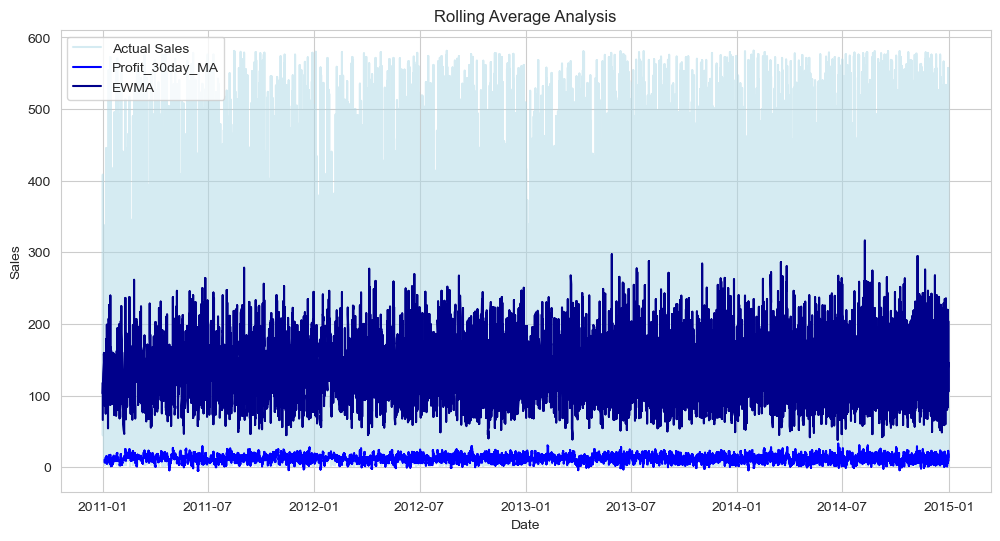

In [183]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(sales["Order Date"], sales["Sales"], label="Actual Sales", color="lightblue", alpha=0.5)
plt.plot(sales["Order Date"], sales["Profit_30day_MA"], label="Profit_30day_MA", color="blue")
plt.plot(sales["Order Date"], sales["Sales_EWMA"], label="EWMA", color="darkblue")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Rolling Average Analysis")
plt.legend()
plt.show()
# See fluctuations vs. trends

> lag features

##### lag features in sales were alredy added in Milestone one so I added lag features to profit and shipping 


In [67]:
# 7-Day Lag Feature for Profit
sales["Profit_Lag_7"] = sales["Profit"].shift(7).fillna(method="bfill")  
# used back fill to avoid NaN values 
display(sales[["Order Date", "Profit", "Profit_Lag_7"]].head(15)) 

# analyize weekly profit patterns

,Order Date,Profit,Profit_Lag_7
25084,2011-01-01,29.640,29.640
22951,2011-01-01,36.036,29.640
9352,2011-01-01,9.240,29.640
42055,2011-01-01,15.342,29.640
31579,2011-01-01,-26.055,29.640
31869,2011-01-01,37.770,29.640
12965,2011-01-02,3.120,29.640
19949,2011-01-03,9.240,29.640
2709,2011-01-03,9.240,36.036
29123,2011-01-03,7.770,9.240


In [69]:
# 30-Day Lag Feature for Profit
sales["Profit_Lag_30"] = sales["Profit"].shift(30).fillna(method="bfill") 

display(sales[["Order Date", "Profit", "Profit_Lag_30"]].head(15))  
# analyize monthly profit patterns

,Order Date,Profit,Profit_Lag_30
25084,2011-01-01,29.640,29.64
22951,2011-01-01,36.036,29.64
9352,2011-01-01,9.240,29.64
42055,2011-01-01,15.342,29.64
31579,2011-01-01,-26.055,29.64
31869,2011-01-01,37.770,29.64
12965,2011-01-02,3.120,29.64
19949,2011-01-03,9.240,29.64
2709,2011-01-03,9.240,29.64
29123,2011-01-03,7.770,29.64


In [179]:
# 30-Day Lag Feature for Shipping Cost
sales["Shipping_Lag_30"] = sales["Shipping Cost"].shift(30).fillna(method="bfill") 

display(sales[["Order Date", "Shipping Cost", "Shipping_Lag_30"]].head(20))
# helps to track the changes in shipping expenses in the span of 30-days : there is no variation in the shipping cost all have the same value 

,Order Date,Shipping Cost,Shipping_Lag_30
0,2011-01-01,8.170000,8.17
1,2011-01-01,9.720000,8.17
2,2011-01-01,35.460000,8.17
3,2011-01-01,1.800000,8.17
4,2011-01-01,4.820000,8.17
5,2011-01-01,4.700000,8.17
6,2011-01-02,24.100000,8.17
7,2011-01-03,12.560000,8.17
8,2011-01-03,26.375915,8.17
9,2011-01-03,5.910000,8.17


In [71]:
# 14-Day Lag Feature for Shipping Cost
sales["Shipping_Lag_14"] = sales["Shipping Cost"].shift(14).fillna(method="bfill") 
display(sales[["Order Date", "Shipping Cost", "Shipping_Lag_14"]].head(24))
# helps to track the changes in shipping expenses in the span of two weeks :the changes sre more here  

,Order Date,Shipping Cost,Shipping_Lag_14
25084,2011-01-01,8.170000,8.170000
22951,2011-01-01,9.720000,8.170000
9352,2011-01-01,35.460000,8.170000
42055,2011-01-01,1.800000,8.170000
31579,2011-01-01,4.820000,8.170000
31869,2011-01-01,4.700000,8.170000
12965,2011-01-02,24.100000,8.170000
19949,2011-01-03,12.560000,8.170000
2709,2011-01-03,26.375915,8.170000
29123,2011-01-03,5.910000,8.170000


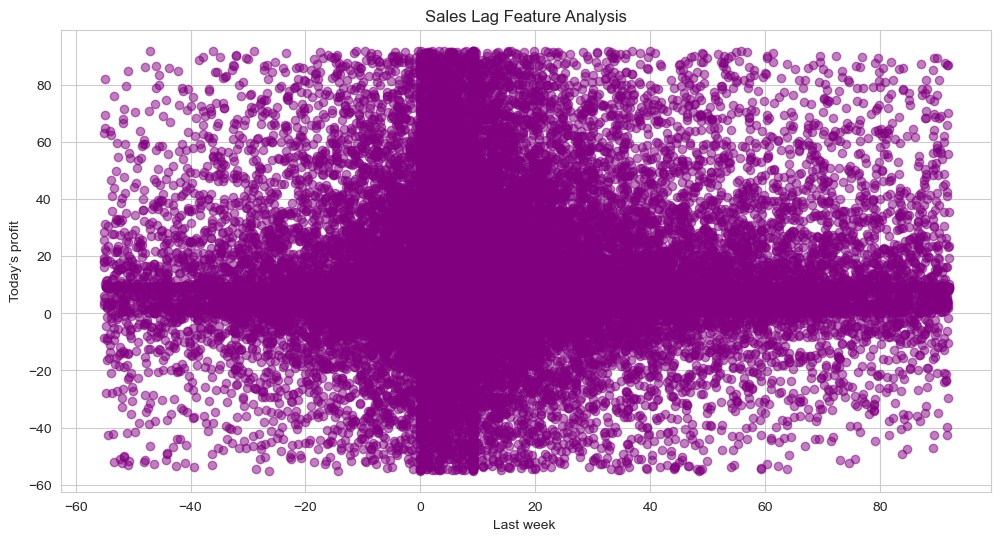

In [199]:
plt.figure(figsize=(12,6))
plt.scatter(sales["Profit_Lag_7"], sales["Profit"], alpha=0.5, color="purple")
plt.xlabel("Last week ")
plt.ylabel("Today’s profit")
plt.title("Sales Lag Feature Analysis")
plt.show()


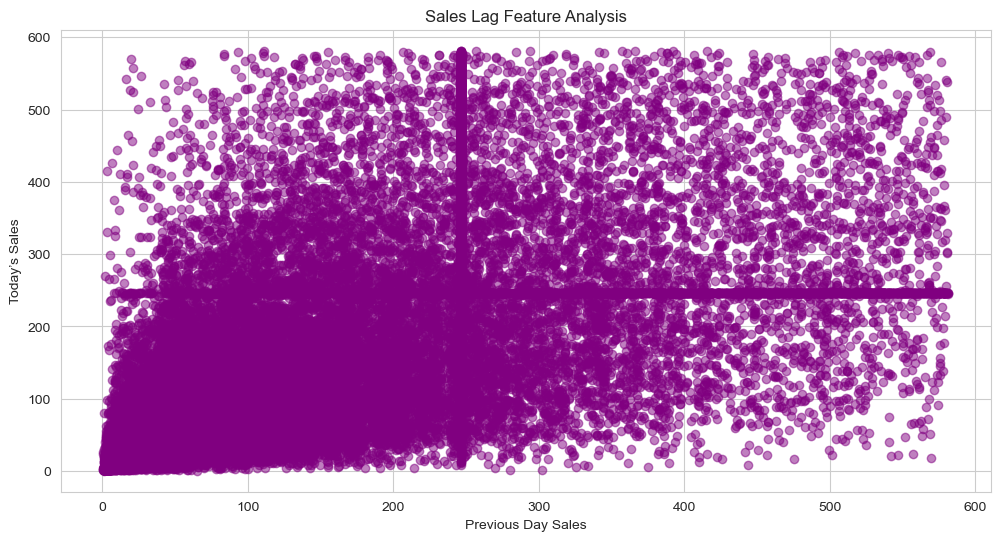

In [193]:
plt.figure(figsize=(12,6))
plt.scatter(sales["Sales_Lag_1D"], sales["Sales"], alpha=0.5, color="purple")
plt.xlabel("Previous Day Sales")
plt.ylabel("Today’s Sales")
plt.title("Sales Lag Feature Analysis")
plt.show()

> Seasonal components

In [102]:
sales["Order Date"] = pd.to_datetime(sales["Order Date"])

sales["Month"] = sales["Order Date"].dt.month_name()
#
sales["DayOfWeek"] = sales["Order Date"].dt.day_name()

sales["Quarter"] = sales["Order Date"].dt.quarter

season_mapping = {1: "Winter", 2: "Winter", 3: "Spring", 4: "Spring",
                  5: "Spring", 6: "Summer", 7: "Summer", 8: "Summer",
                  9: "Fall", 10: "Fall", 11: "Fall", 12: "Winter"}

sales["Season"] = sales["Order Date"].dt.month.map(season_mapping)

sns.set_style("whitegrid")
sns.set_palette("viridis")

month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
season_order = ["Winter", "Spring", "Summer", "Fall"]


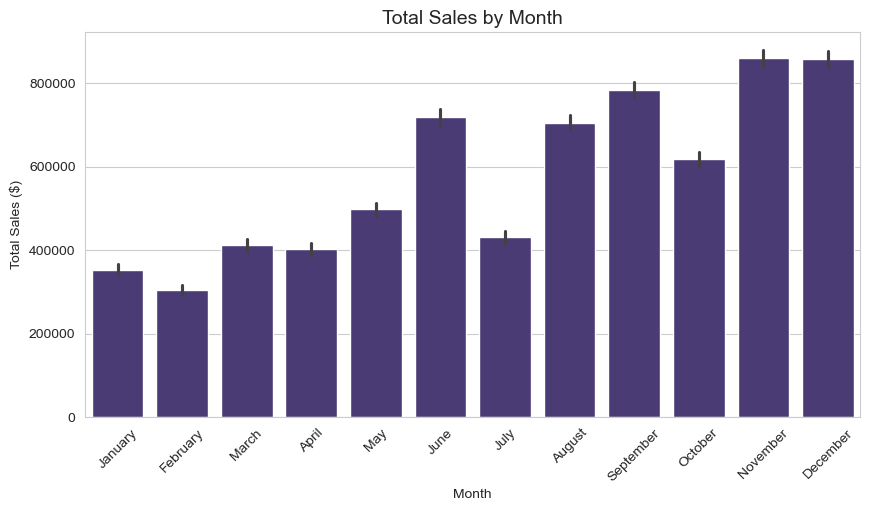

In [104]:
# Sales by the Month
plt.figure(figsize=(10, 5))
sns.barplot(x=sales["Month"], y=sales["Sales"], estimator=sum, order=month_order)
plt.xticks(rotation=45)
plt.title("Total Sales by Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.show()
#It shows that the Total Sales are higher in November and december (at the end of the year)

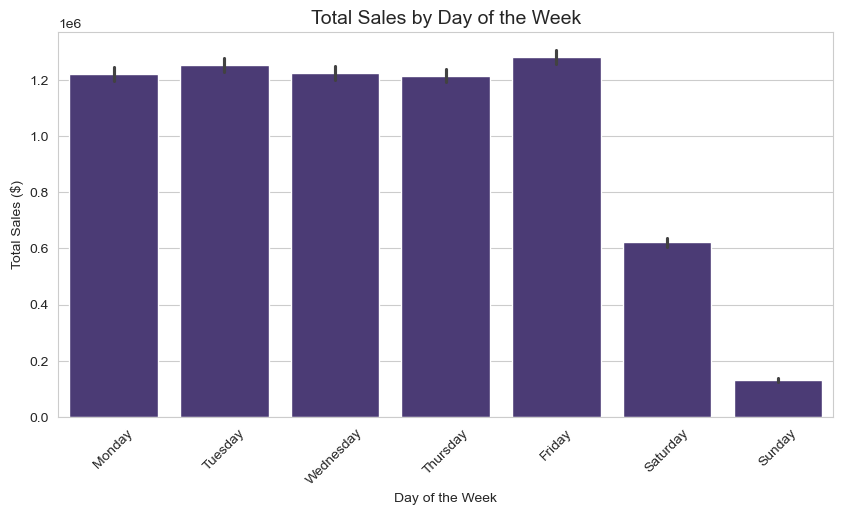

In [107]:
# sales by the day
plt.figure(figsize=(10, 5))
sns.barplot(x=sales["DayOfWeek"], y=sales["Sales"], estimator=sum, order=day_order)
plt.xticks(rotation=45)
plt.title("Total Sales by Day of the Week", fontsize=14)
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales ($)")
plt.show()
# It shows that friday is the highest day of the week in sales 

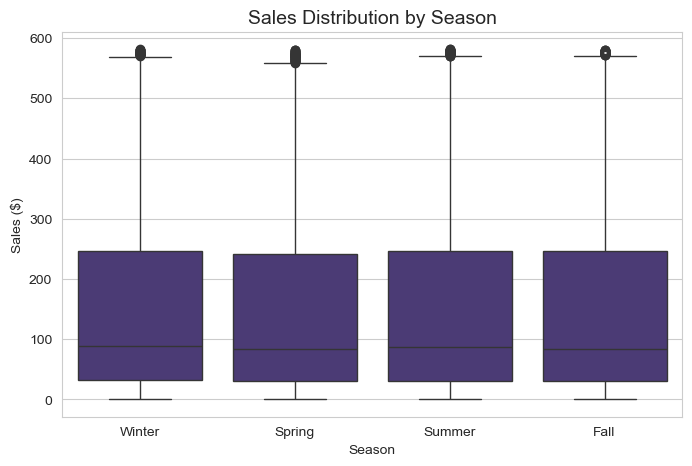

In [109]:
# sales by season
plt.figure(figsize=(8, 5))
sns.boxplot(x=sales["Season"], y=sales["Sales"], order=season_order)
plt.title("Sales Distribution by Season", fontsize=14)
plt.xlabel("Season")
plt.ylabel("Sales ($)")
plt.show()
# all the seasons are close in sales 

### • Perform feature transformations such as scaling, encoding, and aggregating features (e.g., monthly sales totals). 

##### this part aready exist in preprocessing file 


### • Introduce external factors like weather, promotions, or economic conditions to improve the forecast accuracy.


#### promotion is aready in data


In [12]:
sales['Country'].unique()

array(['United States', 'Australia', 'Germany', 'Senegal', 'New Zealand',
       'Afghanistan', 'Saudi Arabia', 'Brazil', 'China', 'France',
       'Italy', 'Tanzania', 'Poland', 'United Kingdom', 'Mexico',
       'El Salvador', 'Taiwan', 'India', 'Dominican Republic',
       'Democratic Republic of the Congo', 'Indonesia', 'Uruguay', 'Iran',
       'Mozambique', 'Bangladesh', 'Spain', 'Ukraine', 'Nicaragua',
       'Morocco', 'Canada', 'Philippines', 'Austria', 'Colombia',
       'Netherlands', 'Malaysia', 'Ecuador', 'Thailand', 'Somalia',
       'Guatemala', 'Belarus', 'Cambodia', 'South Africa', 'Japan',
       'Russia', 'Egypt', 'Azerbaijan', 'Lithuania', 'Argentina',
       'Lesotho', 'Vietnam', 'Cuba', 'Romania', 'Turkey', 'Cameroon',
       'Hungary', 'Singapore', 'Angola', 'Belgium', 'Pakistan', 'Finland',
       'Ghana', 'Zambia', 'Iraq', 'Liberia', 'Georgia', 'Switzerland',
       'Albania', 'Chad', 'Montenegro', 'Namibia', 'Portugal',
       'Madagascar', 'Sweden', 'Myanmar 

In [19]:
pd.set_option('display.max_columns', None)
sales.sample(5)

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Month,Quarter,Year,Day_of_Week,Is_Weekend,Is_Holiday,Season,Total_sales,Shipping Time (Days),Promotion_Flag,Promotion_Above_Avg,Week,Day_of_Month,Holiday,Order Priority_Encoded,Ship Mode_Encoded,Segment_Encoded,Market_Encoded,Category_Encoded,Sub-Category_Encoded,Region_Encoded,Season_Encoded,Sales_Lag_1D,Sales_Lag_7D,Sales_Lag_30D,Economic_condition
26899,2014-11-18,2014-11-18,Same Day,Brenda Bowman,Corporate,Townsville,Queensland,Australia,APAC,Oceania,Office Supplies,Labels,"Novimex Removable Labels, Adjustable",41.958,6,0.1,5.058,7.05,Medium,11,4,2014,1,0,0,Fall,251.748,0,1,1,47,18,0,3,1,1,0,1,10,9,0,38.2077,30.960000,115.2960,High
23710,2013-04-25,2013-04-25,Same Day,Lela Donovan,Corporate,San Justo,Santa Fe,Argentina,LATAM,South,Furniture,Furnishings,"Tenex Clock, Black",100.500,5,0.4,-23.500,9.13,High,4,2,2013,3,0,0,Spring,502.500,0,1,1,17,25,0,1,1,1,5,0,9,10,1,113.7600,246.490581,99.0000,Medium
17094,2012-11-05,2012-11-11,Standard Class,Ralph Kennedy,Consumer,Limoeiro do Norte,Ceará,Brazil,LATAM,South,Furniture,Tables,"Hon Training Table, Rectangular",176.144,2,0.0,-48.456,16.19,Low,11,4,2012,0,0,0,Fall,352.288,6,0,0,45,5,0,2,3,0,5,0,16,10,0,286.8000,50.784000,47.9840,High
31616,2013-09-16,2013-09-20,Standard Class,Grace Kelly,Corporate,Tegucigalpa,Francisco Morazán,Honduras,LATAM,Central,Office Supplies,Paper,"SanDisk Memo Slips, Multicolor",36.780,5,0.4,-12.320,4.80,High,9,3,2013,0,0,0,Fall,183.900,4,1,1,38,16,0,1,3,1,5,1,12,3,0,93.1000,59.535000,50.2281,High
13586,2014-10-10,2014-10-14,Standard Class,Helen Abelman,Consumer,Gisborne,Gisborne,New Zealand,APAC,Oceania,Office Supplies,Storage,"Tenex Lockers, Wire Frame",162.576,2,0.0,9.240,22.57,High,10,4,2014,4,0,0,Fall,325.152,4,0,0,41,10,0,1,3,0,0,1,14,9,0,209.1600,331.023000,197.8200,High


In [6]:
total_sales_per_country = sales.groupby('Country')['Sales'].sum().reset_index()

def categorize_economic(total_sales):
    if total_sales < 3000:
        return 'Very Low'
    elif 3000 <= total_sales < 20000:
        return 'Low'
    elif 20000 <= total_sales < 60000:
        return 'Medium'
    else:
        return 'High'
total_sales_per_country['Economic_condition'] = total_sales_per_country['Sales'].apply(lambda x: categorize_economic(x))

sales_with_economic = sales.merge(total_sales_per_country[['Country', 'Economic_condition']], on='Country')

sales = sales_with_economic

In [7]:
pd.set_option('display.max_columns',None)
sales.sample(2)

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Month,Quarter,Year,Day_of_Week,Is_Weekend,Is_Holiday,Season,Total_sales,Shipping Time (Days),Promotion_Flag,Promotion_Above_Avg,Week,Day_of_Month,Holiday,Order Priority_Encoded,Ship Mode_Encoded,Segment_Encoded,Market_Encoded,Category_Encoded,Sub-Category_Encoded,Region_Encoded,Season_Encoded,Sales_Lag_1D,Sales_Lag_7D,Sales_Lag_30D,Economic_condition
1368,2014-06-11,2014-06-16,Second Class,Sylvia Foulston,Corporate,Kermanshah,Kermanshah,Iran,EMEA,EMEA,Technology,Phones,"Motorola Smart Phone, Full Size",246.490581,2,0.0,9.24,26.375915,Medium,6,2,2014,2,0,0,Summer,2575.92,5,0,0,24,11,0,3,2,1,3,2,13,5,2,246.490581,246.490581,246.490581,High
15845,2014-09-02,2014-09-08,Standard Class,Alejandro Ballentine,Home Office,Zahedan,Sistan Va Baluchestan,Iran,EMEA,EMEA,Furniture,Furnishings,"Rubbermaid Frame, Durable",213.840000,2,0.0,53.46,18.220000,Medium,9,3,2014,1,0,0,Fall,427.68,6,0,0,36,2,0,3,3,2,3,0,9,5,0,315.360000,227.431500,159.894000,High
